<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   neighborhood      61 non-null     object 
 1   flat              61 non-null     object 
 2   flatType          61 non-null     object 
 3   squareMeters      61 non-null     float64
 4   price             61 non-null     int64  
 5   pricePerSM        61 non-null     int64  
 6   constructionYear  61 non-null     int64  
 7   floorNumber       61 non-null     int64  
 8   elevator          61 non-null     object 
 9   condition         61 non-null     object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.9+ KB
       squareMeters          price   pricePerSM  constructionYear  floorNumber
count     61.000000      61.000000    61.000000         61.000000    61.000000
mean      27.903279  101013.672131  3757.278689       2002.819672     3.229508
std        4.887636   30624.300294

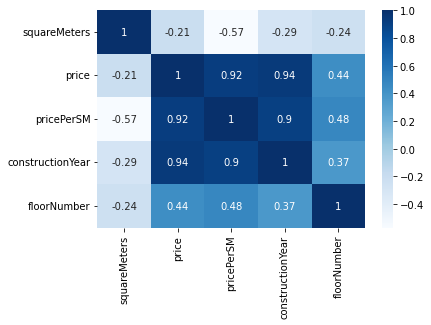

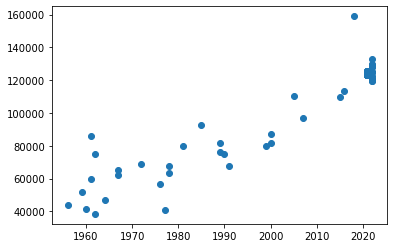

(42,)
(42,)
[-2539481.36544841]
[[1317.58974743]]


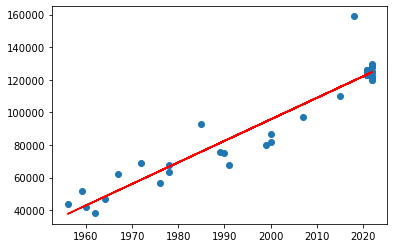

In [18]:
""" ########################

LINEAR REGRESSION USING SKLEARN

    Predicts the the relationship between two variables

    Question:
    How I could predict the selling price using different variables?

    Steps for linear regression
    1. Create x and y
    2. Create Train and Test set
    3. Train the model
    4. Evaluate the model
    5. Make prediction

########################### """

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sn
from sklearn.linear_model import LinearRegression
import numpy as np

data = pd.DataFrame(pd.read_csv("housePrices.csv", sep="\;", decimal=",", engine="python"))
data.head()

# Check the possible null values
data.info()
print(data.describe())

# Create correlation matrix to review correlations
corrMatrix = data.corr()
sn.heatmap(corrMatrix, cmap="Blues", annot=True)
plt.show()

# Construction year seems most correlated to price
# Create scatter plot
plt.scatter(data["constructionYear"], data["price"])
plt.show()

# Prepare the data
x = data["constructionYear"]
y = data["price"]

# Create train and test set
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7,
                                                            test_size = 0.3,
                                                            random_state = 100)

# Sklearn needs 2D array instead of 1D
print(x_train.shape)
print(y_train.shape)

x_train = np.array(x_train)
x_train = x_train.reshape(-1,1)

y_train = np.array(y_train)
y_train = y_train.reshape(-1, 1)

x_test = np.array(x_test)
x_test = x_test.reshape(-1, 1)

y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)


# Fit the regression line using sklearn package
lr = LinearRegression()
lr.fit(x_train, y_train)

# Retrieve the intercept
print(lr.intercept_)

# Retrieve the slope (coefficient of x)
print(lr.coef_)

# Visualise the regression line using the training data (just to check that the regression line makes sense)
plt.scatter(x_train, y_train)
plt.plot(x_train, lr.intercept_ + lr.coef_ * x_train, "r")
plt.show()

# Evaluate accuracy of the model




y_pred = lr.predict(x_test)

